<a href="https://colab.research.google.com/github/LaouaMERiLO/DCT-Image-Compression/blob/main/Discrete_Cosine_Transform_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import r_
import cv2

In [13]:
class dct:
    def __init__(self,f):
        self.n = 8  # This will be the window in which we perform our DCT
        #self,sumd = 0 # INI value

        # Create some blank matrices to store our data
        self.f=self.rgb_togray(f)
        #self.f=self.f.resize((512,512))
        #dctmatrix = np.zeros(np.shape(f)) # Create a DCT matrix in which to plug our values
        self.f = self.f.astype(np.int16) # Convert so we can subtract 128 from each pixel "centrizing"
        self.f = self.f-128 # As said above
        self.res=self.coff_matrix(self.f)
        self.final=self.inverse(self.res)
        #print(self.res)



    def coff_matrix(self,f):
        dctmatrix = np.zeros(np.shape(f))
    # First we need to take into account our multiple nxn windows that jump across the image
        for a in r_[0:np.shape(f)[0]:self.n]:
            for b in r_[0:np.shape(f)[1]:self.n]:
                # Below, compute the DCT for a given uxv location in the DCT Matrix
                for u in r_[a:a+self.n]:
                    for v in r_[b:b+self.n]:
                        dctmatrix[u,v] = self.convolveDCT(f,u,v,a,b)#the large matrix that contain  8*8 sub-matixes

        np.around(dctmatrix)
        self.quantize(dctmatrix)
        return(dctmatrix)

    def cosp(self,i,j): # This is the funky cos function inside the DCT
        output = 0
        output = math.cos(((2*i)+1)*j*math.pi/(2*self.n))
        return output


    def convolveDCT(self,f,u,v,a,b): # This convolve function compute DCT for nxn @ axb location
        sumd = 0                               #INI value
        for x in r_[0:self.n]:
            for y in r_[0:self.n]:
                u = u%self.n
                v = v%self.n
                sumd += f[x+a,y+b]*self.cosp(x,u)*self.cosp(y,v)# a and b the stoping point we get it from the big matirx
        # Now, need to perform the functions outside of the sum values
        sumd*=1/4
        if u == 0: sumd *= 1/math.sqrt(2)
        else: sumd *= 1
        if v == 0: sumd *= 1/math.sqrt(2)
        else: sumd *= 1
        sumd *= 1/math.sqrt(2*self.n)

        return sumd

    def rgb_togray(self,img2):

        r=img2[:,:,0]
        g=img2[:,:,1]
        b=img2[:,:,2]
        gray=np.array( r*0.299+g*0.587+b*0.114).astype('int')
        return gray
    def quantize(self,dctmatrice):
        Quant = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99] ])

        for a in r_[0:np.shape(self.f)[0]:self.n]:
            for b in r_[0:np.shape(self.f)[1]:self.n]:
                dctmatrice[a:a+self.n,b:b+self.n] = dctmatrice[a:a+self.n,b:b+self.n]/Quant

    def convolveIDCT(self,dctmatrix,x,y,a,b): # This convolve function compute DCT for nxn @ axb location
        sumd = 0                               #INI value
        for u in r_[0:self.n]:
            for v in r_[0:self.n]:
                val1 = 1
                val2 = 1
                x = x%self.n
                y = y%self.n
                if u == 0: val1 = 1/math.sqrt(2)
                if v == 0: val2 = 1/math.sqrt(2)
                sumd += dctmatrix[u+a,v+b]*val1*val2*self.cosp(x,u)*self.cosp(y,v)
        # Now, need to perform the functions outside of the sum values
        sumd *= 1/4
        return sumd


    def inverse(self,dctmatrix):
        f2 = np.zeros(np.shape(self.f))
    # First we need to take into account our multiple nxn windows that jump across the image
        for a in r_[0:np.shape(dctmatrix)[0]:self.n]:
            for b in r_[0:np.shape(dctmatrix)[1]:self.n]:
                # Below, compute the IDCT for a given x,y location in the Image Matrix
                for x in r_[a:a+self.n]:
                    for y in r_[b:b+self.n]:
                        f2[x,y] = self.convolveIDCT(dctmatrix,x,y,a,b)

        f2 = f2 + 128 # Scale our values back to 0-255 so we can see it!

        # Let's see how she looks AFTER Quantization!
        plt.figure(figsize=(8, 8))
        plt.imshow(f2, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()


# Results

### original image

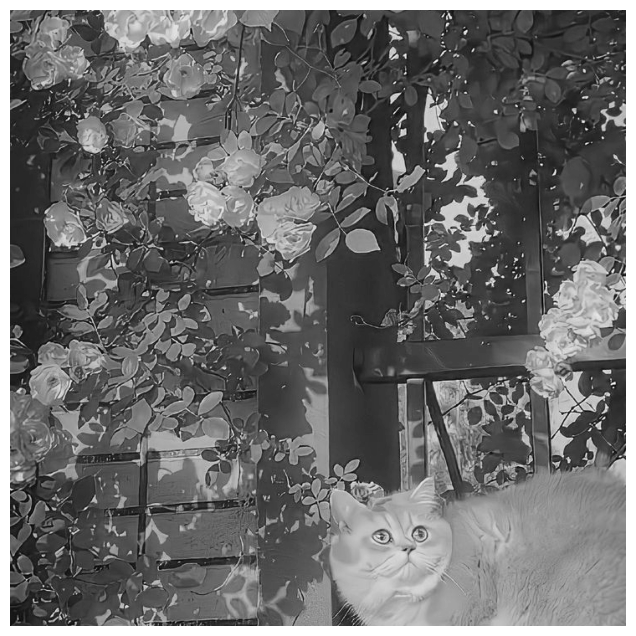

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/1691716916419.jpg')

# Calculate the dimensions for a square image
min_dimension = min(image.shape[0], image.shape[1])
start_row = (image.shape[0] - min_dimension) // 2
end_row = start_row + min_dimension
start_col = (image.shape[1] - min_dimension) // 2
end_col = start_col + min_dimension

# Crop and resize the image to a square
square_image = image[start_row:end_row, start_col:end_col]

# Convert the square image to grayscale
gray_image = cv2.cvtColor(square_image, cv2.COLOR_RGB2GRAY)

# Display the squared grayscale image
plt.figure(figsize=(8, 8))
plt.axis('off')  # Turn off axes
plt.imshow(gray_image, cmap='gray')
plt.show()


### Compressed Image

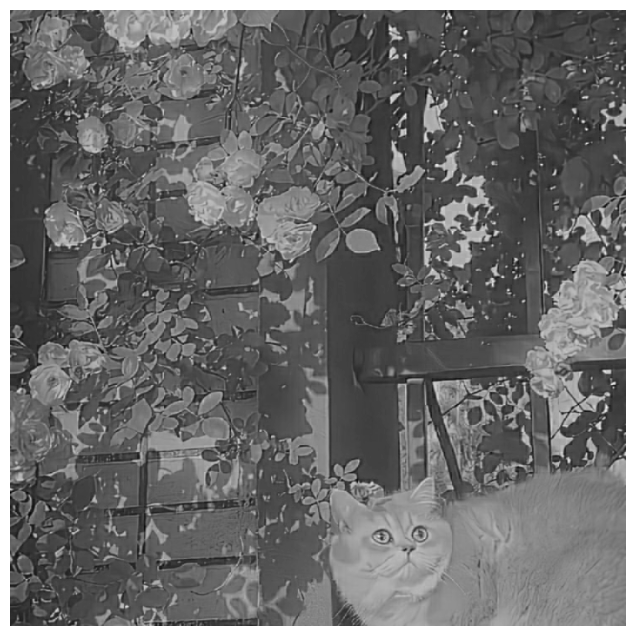

In [20]:
dct(square_image)